## Problem statment
---X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 ## Business goal
---X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [239]:
import jovian

<IPython.core.display.Javascript object>

In [241]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Committed successfully! https://jovian.ai/kumariambika679/lead-score-assignment


'https://jovian.ai/kumariambika679/lead-score-assignment'

In [1]:
#suppressing warning 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import statsmodels.api as sm

%matplotlib inline

# Step 1:- Reading data, understanding data

In [3]:
lead = pd.read_csv("Leads.csv")
lead.head(8)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified


In [4]:
lead.shape

(9240, 37)

In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead.isnull().any()

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper 

In [7]:
#print columns having null values
print(lead.columns[lead.isnull().any()])

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [8]:
print(lead.isna().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2:- Data Cleaning

In [10]:
# checking the percentage value of null value in each columns
percent_null = round(100*(lead.isnull().sum()/len(lead.index)),2)
print(percent_null)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Check if there are any duplicate values in the dataset
lead[lead.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [12]:
# Drop if there are any duplicate values in the dataset
lead.drop_duplicates(subset=None,keep ='first',inplace = False)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


###### 
No Duplicates in the dataset.

In [13]:
# Drop Prospect ID column for analysis
lead.drop('Prospect ID',axis=1,inplace=True)

In [14]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
## There are columns with value 'Select' convert those values in nan because customer has not selected any options .
# a.Specialization
# b. How did you hear about X Education
# c. Lead Profile
# d. City
## So replacing 'Select' with NaN.

lead['Specialization'] = lead['Specialization'].replace('Select',np.nan)
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace('Select',np.nan)
lead['Lead Profile'] = lead['Lead Profile'].replace('Select',np.nan)
lead['City'] = lead['City'].replace('Select',np.nan)

In [16]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [17]:
## Finding the null percentage for all the columns:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [18]:
# we will drop columns which contains null value more than 70%
  
lead = lead.loc[:,round(100*(lead.isnull().sum())/len(lead.index),2)< 70]
lead.head()


,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [19]:
# Finding the null percentage for all the columns after droping
per_miss = round(100*(lead.isnull().sum())/len(lead.index),2)
per_miss

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [20]:
# Highest null value contains 'Lead Quality'
lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [21]:
lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

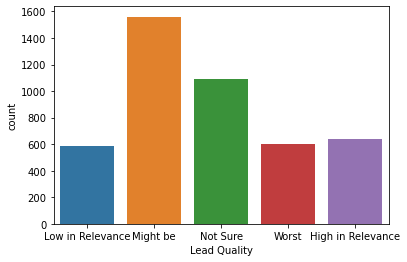

In [22]:
sns.countplot(lead['Lead Quality'])
plt.show()

In [23]:
# find out the rating having highest frequency.
lead['Lead Quality'].mode()

0    Might be
dtype: object

In [24]:
#  replace null values with 'Might be' as we do not want to lose any potential customers.
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan,'Might be')

In [25]:
lead['Lead Quality'].isnull().sum()

0

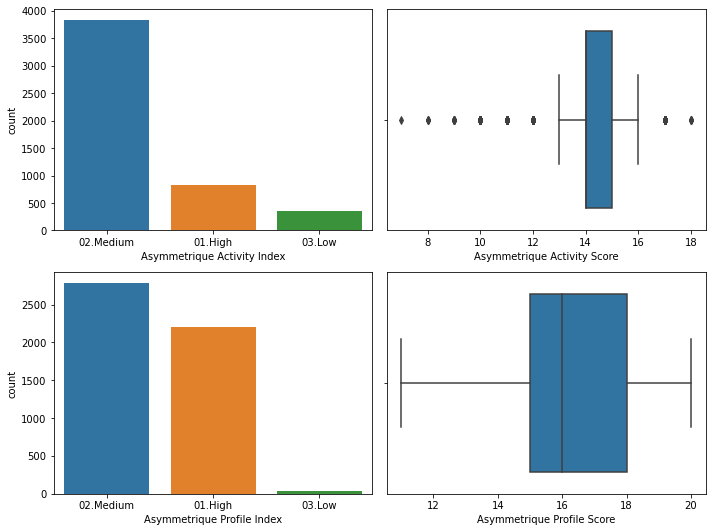

In [26]:
# Visualizing the variables
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(lead['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(lead['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(lead['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(lead['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [27]:
# we will drop relevent column from dataset
lead =lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                    'Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1)

In [28]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Interested in other courses,Low in Relevance,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,Ringing,Might be,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [29]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [30]:
# Finding the null percentage for all the columns after dropping
round(100*(lead.isnull().sum())/len(lead.index),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [31]:
# Highest value_counts contains 'City '
lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
lead['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

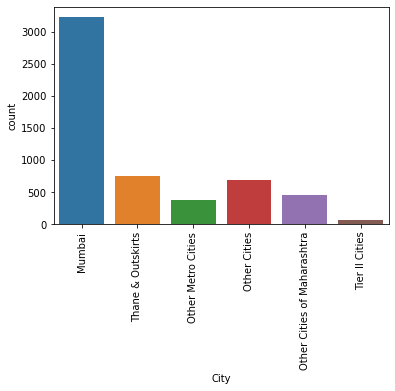

In [33]:
sns.countplot(lead['City'])
xticks(rotation = 90)
plt.show()

In [34]:
# find out the rating having highest frequency.
lead['City'].mode()

0    Mumbai
dtype: object

In [35]:
#  replace null values with 'City' as we do not want to lose any potential customers.
lead['City'] = lead['City'].replace(np.nan,'Mumbai')

In [36]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,Ringing,Might be,No,No,Mumbai,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [37]:
# Verifying the null values for all the columns now again after imputing the values for 'City'
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [38]:
lead['City'].isnull().sum()

0

In [39]:
# Highest null value contains 'Specialization' 
lead['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [40]:
lead['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

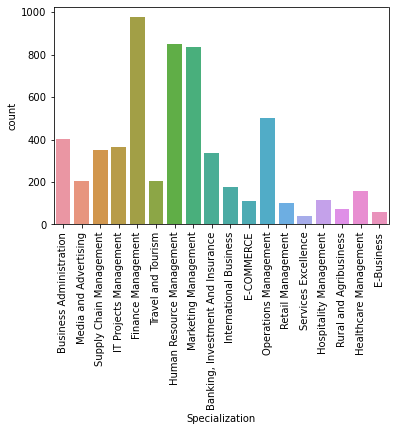

In [41]:
# The next column with highest NaN values is Specialization
sns.countplot(lead.Specialization)
xticks(rotation=90)
plt.show()

In [42]:
lead.Specialization.unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [43]:
#  replace null values with 'Specialization' as we do not want to lose any potential customers.
lead['Specialization'] = lead['Specialization'].replace(np.nan,'Others')

In [44]:
lead['Specialization'].head()

0                     Others
1                     Others
2    Business Administration
3      Media and Advertising
4                     Others
Name: Specialization, dtype: object

In [45]:
# Verifying the null values for all the columns now again after imputing the values for 'Specialization'
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

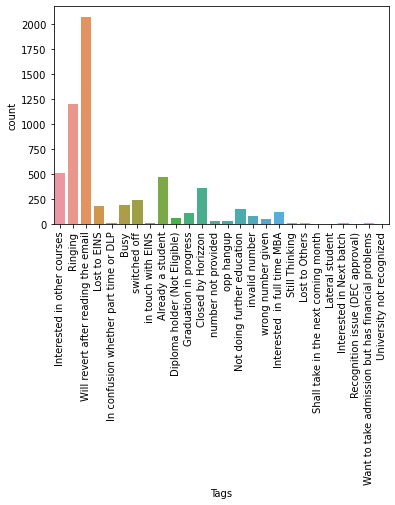

In [46]:
# The next column with highest NaN  values is 'Tags'
sns.countplot(lead.Tags)
xticks(rotation=90)
plt.show()

In [47]:
lead['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [48]:
lead['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [49]:
# So here we shall impute with the value 'Will revert after reading the email'
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

In [50]:
# Verifying the null values for all the columns now again after imputing the values for 'Tags'
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

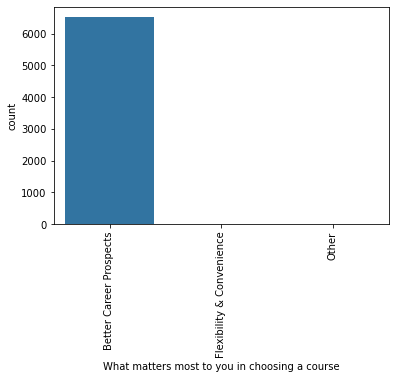

In [51]:
# the next column with highest NaN values is 'What matters most to you in choosing a course'
sns.countplot(lead['What matters most to you in choosing a course'])
xticks(rotation=90)
plt.show()

In [52]:
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [53]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [54]:
# Verifying the null values for all the columns now again after imputing the values for 'What matters most to you in choosing a course'
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

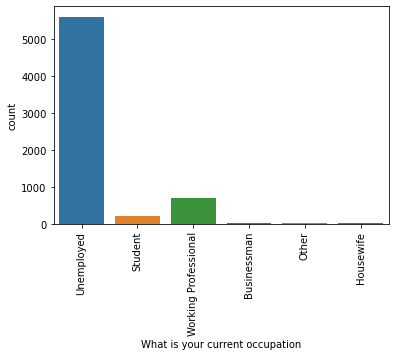

In [55]:
# The next column with highest NaN values is 'What is your current occupation'
sns.countplot(lead['What is your current occupation'])
xticks(rotation=90)
plt.show()

In [56]:
lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [57]:
# In this case around 85% of the records have values 'Unemployed'.
# From business aspect we might infer that NaN values should be imputed to 'Other'.
# However here we will go along with the data and will impute NaN values with 'Unemployed'.

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')


In [58]:
# Verifying the null values for all the columns now again after imputing the values for 'What is your current occupation'
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [59]:
# The next column with highest NaN values is 'Country'.
lead['Country'].describe()


count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

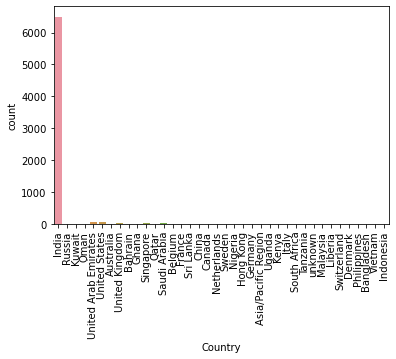

In [60]:
sns.countplot(lead['Country'])
xticks(rotation=90)
plt.show()

In [61]:
lead['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [62]:
#As India has the highest frequency we would impute 'India' for NaN values.

lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [63]:
lead['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [64]:
# Verifying the null values for all the columns now again after imputing the values for 'Country'
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

###### 
Now the remaining columns has around 3% of the missing data which is very less. As it would not impact our EDA we would keep it as it is.

# Step 3:- EDA

In [65]:
# Converted by definition implies the target variable. Indicates whether a lead has been successfully converted or not.
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

38.53896103896104

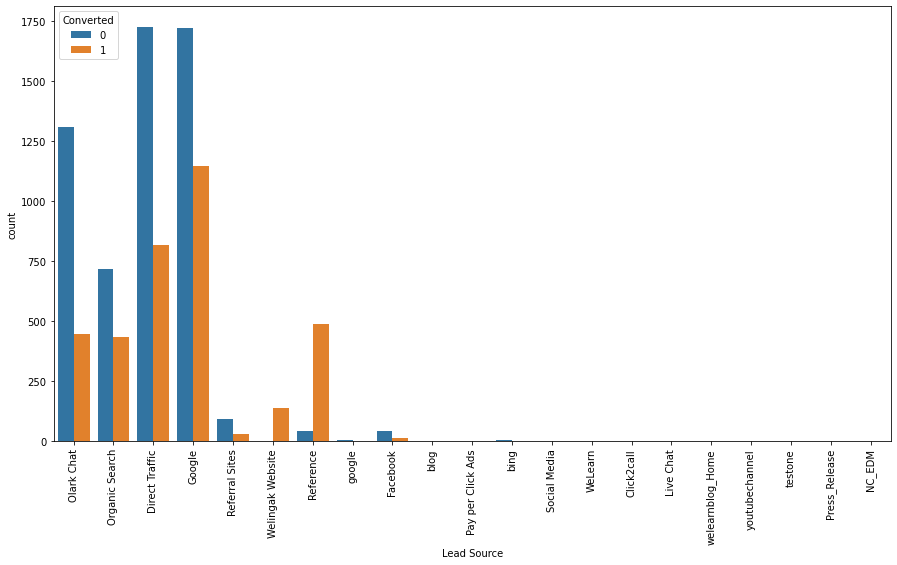

In [66]:
# Lead Source- The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
xticks(rotation = 90)
plt.show()

In [67]:
lead['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

###### 
As can be seen 'Google' and 'google' both are same. Also, from the plot we can categorize 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 'Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM' into 'Other_Platforms'.

In [68]:
# For nan values we can replace it as Null value .
lead['Lead Source'] = lead['Lead Source'].fillna('Null')


In [69]:
# Modifying 'google' to 'Google'
# Replacing all other categories having low or no conversion into other platforms.
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'] = lead['Lead Source'].replace([ 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 
                                                  'Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel', 'testone', 
                                                   'Press_Release', 'NC_EDM','Null'], 'Other_Platforms')

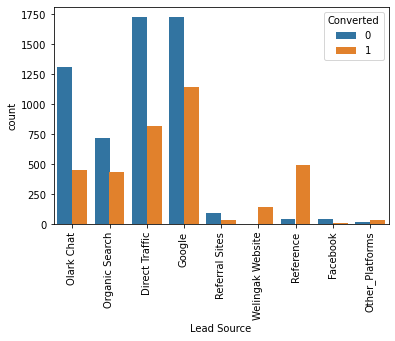

In [70]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
xticks(rotation = 90)
plt.show()

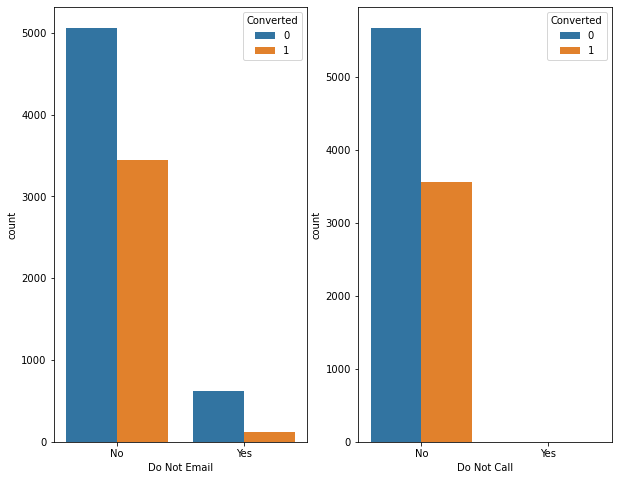

In [71]:
fig, axs = plt.subplots(1,2,figsize = (10,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead, ax = axs[1])
plt.show()

###### Treating the Outliers:

In [72]:
coloums = ['Total Time Spent on Website', 'Page Views Per Visit','TotalVisits']

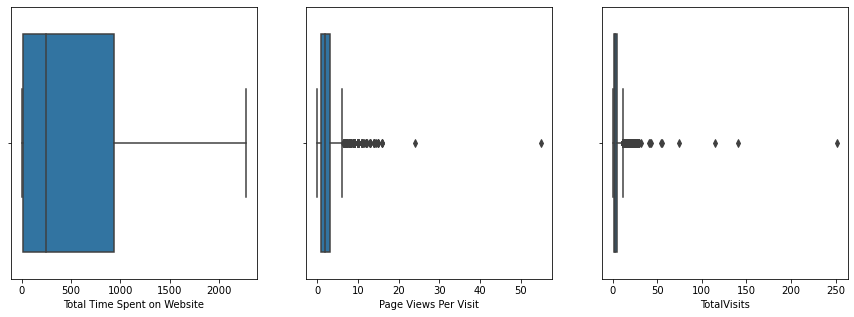

In [73]:
# Plotting for outliers
plt.figure(figsize = (15, 5))
for i, colo in enumerate(coloums):
    plt.subplot(1,3, i+1)
    sns.boxplot(lead[colo])
plt.show()

In [74]:
# Removing outliers using 1.5 IQR method
for colo in coloums:
    q1 = lead[colo].quantile(0.25)
    q3 = lead[colo].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)

    lead = lead.loc[(lead[colo] >= lower_bound) & (lead[colo] <= upper_bound)]

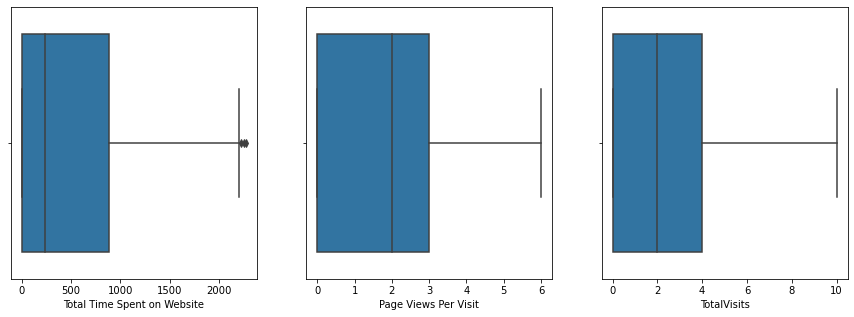

In [75]:
# Plotting for outliers
plt.figure(figsize = (15, 5))
for i, col in enumerate(coloums):
    plt.subplot(1,3, i+1)
    sns.boxplot(lead[col])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Had a Phone Conversation'),
  Text(9, 0, 'View in browser link Clicked'),
  Text(10, 0, 'Unsubscribed'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

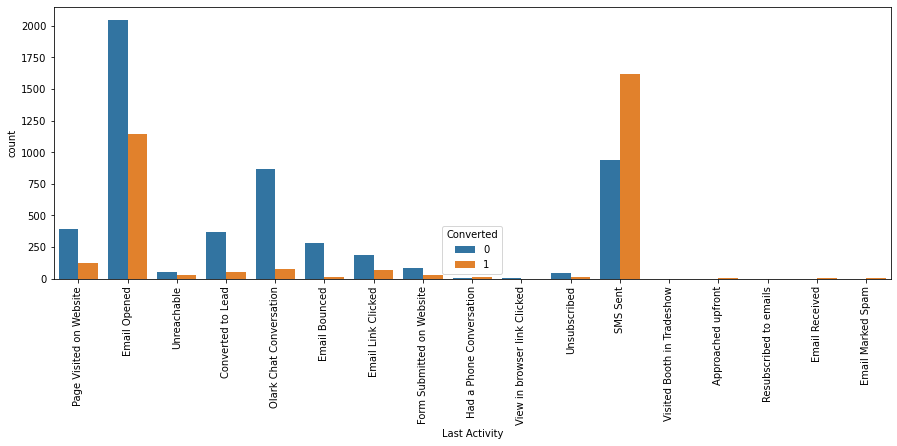

In [76]:
# Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
xticks(rotation = 90)

In [77]:
lead['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Unsubscribed', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Approached upfront', 'Resubscribed to emails', 'Email Received',
       'Email Marked Spam'], dtype=object)

In [78]:
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront',
                                                       'Resubscribed to emails','Email Received','Email Marked Spam'],'Others Activity')

In [79]:
lead['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website',
       'Others Activity', 'Unsubscribed', 'SMS Sent'], dtype=object)

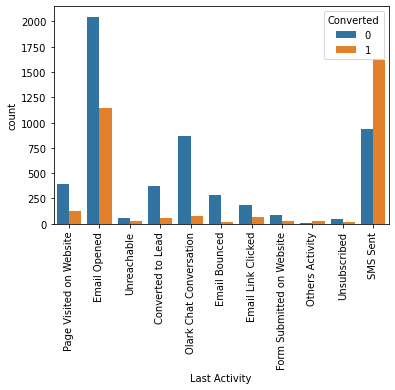

In [80]:
sns.countplot(x='Last Activity',hue = 'Converted',data = lead)
xticks(rotation = 90)
plt.show()

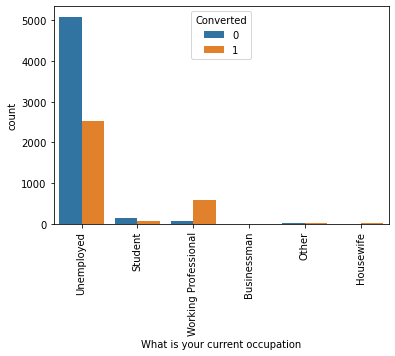

In [81]:
# visualize What is your current occupation 
sns.countplot(x='What is your current occupation',hue = 'Converted',data = lead)
xticks(rotation = 90)
plt.show()


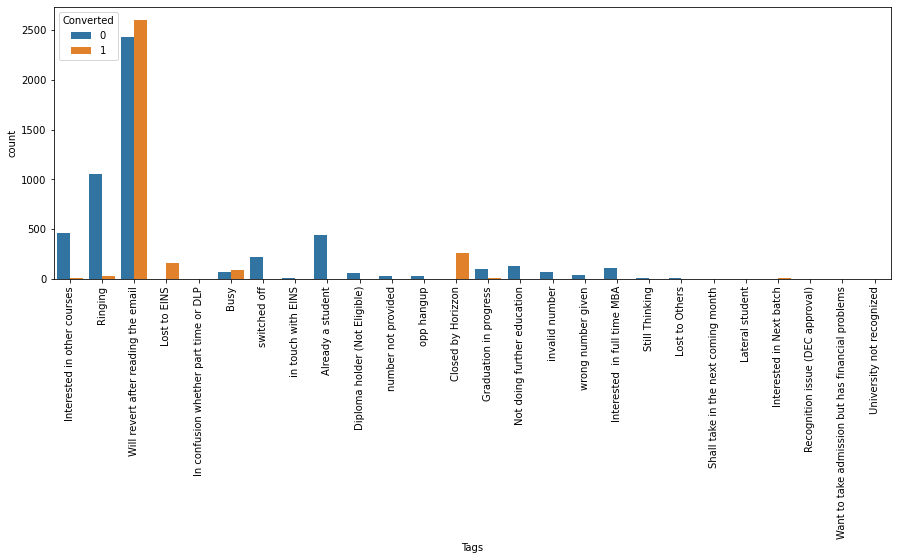

In [82]:
# visualize of Tags 
plt.subplots(figsize = (15,5))
sns.countplot(x='Tags',hue = 'Converted',data= lead)
xticks(rotation=90)
plt.show()

In [83]:
lead['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'number not provided',
       'opp hangup', 'Closed by Horizzon', 'Graduation in progress',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [84]:
# replce last activities in other_Tags
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP','in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'],'Other_Tags')

In [85]:
lead['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'Other_Tags', 'Busy', 'switched off', 'Already a student',
       'Closed by Horizzon', 'Not doing further education',
       'invalid number', 'wrong number given',
       'Interested  in full time MBA'], dtype=object)

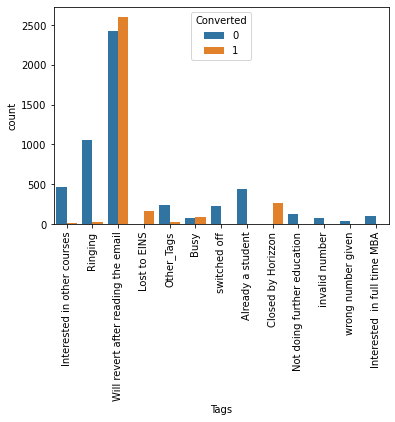

In [86]:
sns.countplot(x='Tags',hue='Converted',data=lead)
xticks(rotation=90)
plt.show()

In [87]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [88]:
lead['Country'].describe()

count      8474
unique       38
top       India
freq       8207
Name: Country, dtype: object

###### 
Mose value is India so no inference can be drawn

In [89]:
lead['Search'].describe()

count     8474
unique       2
top         No
freq      8468
Name: Search, dtype: object

###### 
Most value is No so infrence can be drawn.

In [90]:
lead['Magazine'].describe()

count     8474
unique       1
top         No
freq      8474
Name: Magazine, dtype: object

###### 
Most value is No so infrence can be drawn.

In [91]:
lead['Newspaper Article'].describe()

count     8474
unique       1
top         No
freq      8474
Name: Newspaper Article, dtype: object

###### 
Most value is No so infrence can be drawn.

In [92]:
lead['X Education Forums'].describe()

count     8474
unique       1
top         No
freq      8474
Name: X Education Forums, dtype: object

###### 
Most value is No so infrence can be drawn.

In [93]:
lead['Newspaper'].describe()

count     8474
unique       2
top         No
freq      8473
Name: Newspaper, dtype: object

###### 
Most value is No so infrence can be drawn.

In [94]:
lead['Digital Advertisement'].describe()

count     8474
unique       2
top         No
freq      8472
Name: Digital Advertisement, dtype: object

###### 
Most value is No so infrence can be drawn.

In [95]:
lead['Through Recommendations'].describe()

count     8474
unique       2
top         No
freq      8471
Name: Through Recommendations, dtype: object

###### 
Most value is No so infrence can be drawn.

In [96]:
lead['Receive More Updates About Our Courses'].describe()

count     8474
unique       1
top         No
freq      8474
Name: Receive More Updates About Our Courses, dtype: object

###### 
Most value is No so infrence can be drawn.

In [97]:
lead['Update me on Supply Chain Content'].describe()

count     8474
unique       1
top         No
freq      8474
Name: Update me on Supply Chain Content, dtype: object

###### 
Most value is No so infrence can be drawn.

In [98]:
lead['Get updates on DM Content'].describe()

count     8474
unique       1
top         No
freq      8474
Name: Get updates on DM Content, dtype: object

###### 
Most value is No so infrence can be drawn.

In [99]:
lead['I agree to pay the amount through cheque'].describe()

count     8474
unique       1
top         No
freq      8474
Name: I agree to pay the amount through cheque, dtype: object

###### 
Most value is No so infrence can be drawn.

In [100]:
lead['A free copy of Mastering The Interview'].describe()

count     8474
unique       2
top         No
freq      5939
Name: A free copy of Mastering The Interview, dtype: object

###### 
Most value is No so infrence can be drawn.

In [101]:
lead['Last Notable Activity'].describe()

count         8474
unique          16
top       Modified
freq          3111
Name: Last Notable Activity, dtype: object

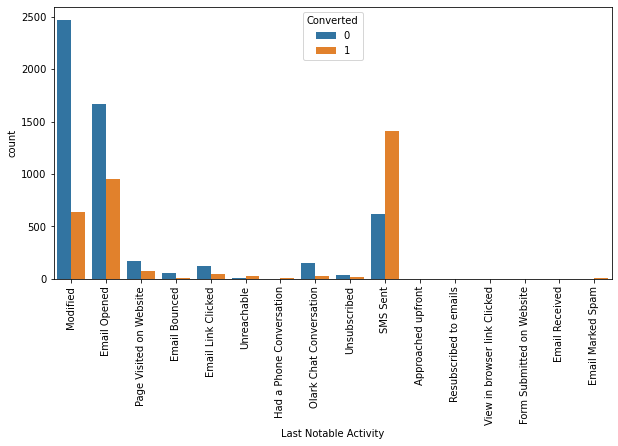

In [102]:
plt.figure(figsize=(10,5))
sns.countplot(x='Last Notable Activity', hue='Converted',data=lead)
xticks(rotation=90)
plt.show()

In [103]:
lead['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Had a Phone Conversation', 'Olark Chat Conversation',
       'Unsubscribed', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [104]:
# replace last activity in Others_activities.
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],'Others_activities')

In [105]:
lead['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Had a Phone Conversation', 'Olark Chat Conversation',
       'Unsubscribed', 'SMS Sent', 'Others_activities'], dtype=object)

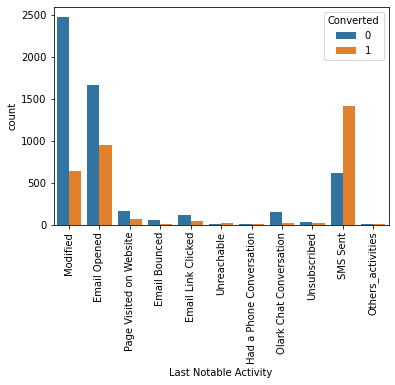

In [106]:
sns.countplot(x='Last Notable Activity', hue='Converted',data=lead)
xticks(rotation=90)
plt.show()

In [107]:
lead['What matters most to you in choosing a course'].describe()

count                        8474
unique                          3
top       Better Career Prospects
freq                         8472
Name: What matters most to you in choosing a course, dtype: object

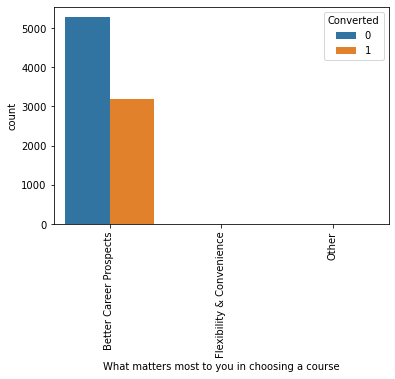

In [108]:
#visualize What matters most to you in choosing a course 
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=lead)
xticks(rotation=90)
plt.show()

###### 
As can be seen from the above plot even though the reason chosen by the candidate to choose a particular course is 'Better Career Prospects' the conversion rate is very low as compared to the other.

In [109]:
lead['TotalVisits'].describe()

count    8474.000000
mean        2.744985
std         2.331743
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        10.000000
Name: TotalVisits, dtype: float64

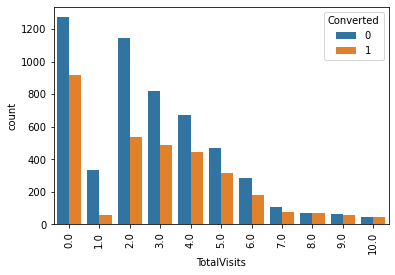

In [110]:
sns.countplot(x='TotalVisits',hue='Converted',data=lead)
xticks(rotation=90)
plt.show()

In [111]:
lead.skew()

Lead Number                    0.139171
Converted                      0.509606
TotalVisits                    0.723748
Total Time Spent on Website    1.017632
Page Views Per Visit           0.394822
dtype: float64

In [112]:
new_lead = lead.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                     'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                     'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                     'Get updates on DM Content','I agree to pay the amount through cheque',
                     'A free copy of Mastering The Interview'],axis=1)

In [113]:
new_lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Ringing,Might be,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [114]:
new_lead.shape

(8474, 17)

In [115]:
new_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      8474 non-null   int64  
 1   Lead Origin                      8474 non-null   object 
 2   Lead Source                      8474 non-null   object 
 3   Do Not Email                     8474 non-null   object 
 4   Do Not Call                      8474 non-null   object 
 5   Converted                        8474 non-null   int64  
 6   TotalVisits                      8474 non-null   float64
 7   Total Time Spent on Website      8474 non-null   int64  
 8   Page Views Per Visit             8474 non-null   float64
 9   Last Activity                    8474 non-null   object 
 10  Country                          8474 non-null   object 
 11  Specialization                   8474 non-null   object 
 12  What is your current

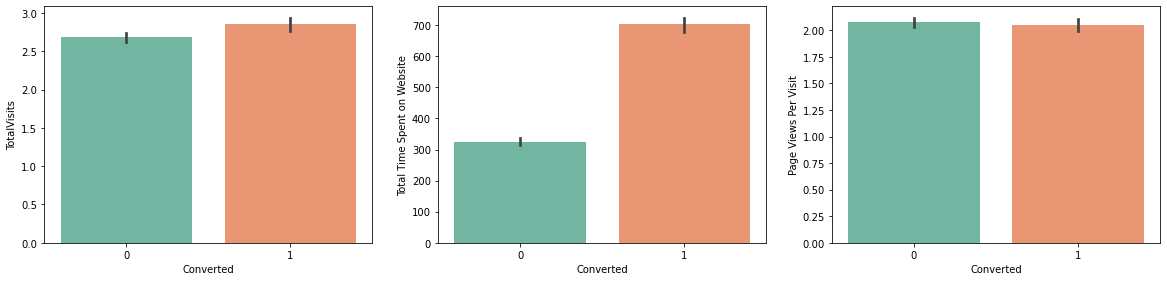

In [116]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = lead)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = lead)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = lead)
plt.show()

###### 
The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

# Step 4:- Data prepartion / Dummy creating

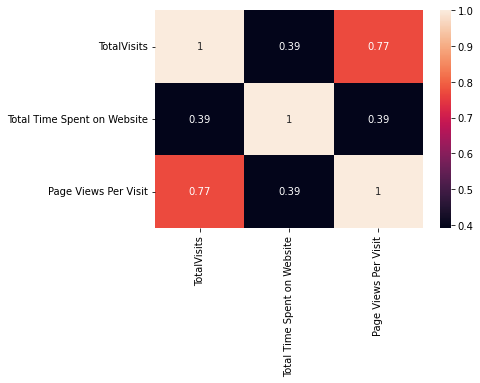

In [117]:
# Now we will plot a heatmap to verify the correlation of the variables.
sns.heatmap(new_lead.drop(['Lead Number', 'Converted'], axis = 1).corr(),annot=True)
plt.show()

###### 
Converting some binary variables yes/no(0/1)

In [118]:
# Creating dummy variable
var_list = ['Do Not Email', 'Do Not Call']
def binary_map(x):
    return x.map({'Yes':1,'No':0})
new_lead[var_list] = new_lead[var_list].apply(binary_map)

In [119]:
new_lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Ringing,Might be,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [120]:
# creating dummy variables of columns which is below
column_dummies = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                       'What is your current occupation','Lead Quality','Tags', 'City', 'Last Notable Activity']


In [121]:
dummies = pd.get_dummies(new_lead[column_dummies],drop_first = True)
#concat in original dataset
new_lead = pd.concat([new_lead,dummies],axis=1)

In [122]:
new_lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,1,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,1,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0


In [123]:
#dropping original columns
new_lead.drop(column_dummies, axis=1 , inplace = True)

In [124]:
new_lead.shape

(8474, 119)

In [125]:
new_lead.corr()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,1.000000,-0.095437,0.012636,0.027578,0.059912,0.023074,0.070690,-0.063166,0.022970,0.077940,...,0.017642,0.078149,0.002857,0.073912,-0.033895,-0.007999,0.001177,-0.162859,0.009258,-0.004975
Do Not Email,-0.095437,1.000000,-0.004458,-0.131760,-0.019896,-0.041887,0.010699,0.096844,-0.020278,-0.017294,...,-0.037011,-0.186040,-0.009973,0.115662,-0.013824,0.022355,0.033414,-0.024335,-0.009870,0.251824
Do Not Call,0.012636,-0.004458,1.000000,0.019770,0.011565,0.007776,-0.005261,-0.015998,0.025629,-0.000916,...,-0.002131,-0.010256,-0.000528,0.020173,-0.002218,-0.000442,-0.002612,-0.008621,-0.000916,-0.001123
Converted,0.027578,-0.131760,0.019770,1.000000,0.035594,0.338312,-0.007444,-0.044311,0.319193,-0.009419,...,-0.032658,-0.019296,0.037133,-0.268550,-0.076030,0.020041,-0.027452,0.370378,0.039789,-0.013221
TotalVisits,0.059912,-0.019896,0.011565,0.035594,1.000000,0.391532,0.770158,0.495099,-0.306565,-0.070173,...,-0.019410,0.097999,0.014079,-0.153054,-0.073327,0.017238,0.150624,0.031124,0.021858,0.015652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Others_activities,-0.007999,0.022355,-0.000442,0.020041,0.017238,0.009553,0.002201,0.002950,0.008019,-0.001714,...,-0.003989,-0.019193,-0.000988,-0.021899,-0.004151,1.000000,-0.004888,-0.016133,-0.001714,-0.002101
Last Notable Activity_Page Visited on Website,0.001177,0.033414,-0.002612,-0.027452,0.150624,0.025706,0.028778,0.037454,-0.010935,-0.010133,...,-0.023582,-0.113473,-0.005843,-0.129472,-0.024541,-0.004888,1.000000,-0.095381,-0.010133,-0.012421
Last Notable Activity_SMS Sent,-0.162859,-0.024335,-0.008621,0.370378,0.031124,0.130739,0.072244,0.047910,0.130817,-0.028788,...,-0.077837,-0.374536,-0.019286,-0.427342,-0.081000,-0.016133,-0.095381,1.000000,-0.033444,-0.040997
Last Notable Activity_Unreachable,0.009258,-0.009870,-0.000916,0.039789,0.021858,0.009405,0.023423,-0.002408,0.006687,-0.003553,...,-0.008269,-0.039788,-0.002049,-0.045398,-0.008605,-0.001714,-0.010133,-0.033444,1.000000,-0.004355


In [126]:
new_lead.set_index('Lead Number',inplace=True)

In [127]:
new_lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660728,0,0,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660727,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660719,0,0,0,1.0,305,1.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660681,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [128]:
new_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 660737 to 579533
Columns: 118 entries, Do Not Email to Last Notable Activity_Unsubscribed
dtypes: float64(2), int64(4), uint8(112)
memory usage: 1.4 MB


In [129]:
percent_missing = round(100*(new_lead.isnull().sum())/len(new_lead.index),2)
print(percent_missing)

Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
                                                ... 
Last Notable Activity_Others_activities          0.0
Last Notable Activity_Page Visited on Website    0.0
Last Notable Activity_SMS Sent                   0.0
Last Notable Activity_Unreachable                0.0
Last Notable Activity_Unsubscribed               0.0
Length: 118, dtype: float64


# STEP 5:- Train-Test split

In [130]:
# Putting feature variable to X
X = new_lead.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660728,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660727,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660719,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660681,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [131]:
# storing response variable to y
y = new_lead['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [132]:
# Spliting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state=100)

In [133]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
618332,0,0,3.0,1367,3.0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
605316,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
655685,0,0,4.0,281,4.0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
581653,0,0,4.0,874,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
619035,0,0,4.0,299,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [134]:
y_train.head()

Lead Number
618332    1
605316    1
655685    0
581653    0
619035    1
Name: Converted, dtype: int64

In [135]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
590700,0,0,4.0,152,4.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
594833,0,0,3.0,692,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
600817,0,0,8.0,1241,1.6,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
656621,0,0,3.0,35,3.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
580732,1,0,1.0,479,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [136]:
y_test.head()

Lead Number
590700    0
594833    1
600817    0
656621    0
580732    0
Name: Converted, dtype: int64

# STEP 6 :-  Feature Scaling

In [137]:
# scaling of continous variables
scalar = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scalar.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
618332,0,0,0.102041,1.661198,0.554013,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
605316,0,0,-1.181084,-0.862145,-1.253883,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
655685,0,0,0.529750,-0.343448,1.156645,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
581653,0,0,0.529750,0.751170,-0.048619,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
619035,0,0,0.529750,-0.310222,1.156645,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [138]:
# checking the conversion rate
conversion_rate = (sum(lead['Converted'])/len(lead['Converted'].index))*100
conversion_rate

37.65636063252301

###### 
We have around 38% conversion rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

# STEP 7 :- Model Building

In [139]:
logml = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5821
Model Family:                Binomial   Df Model:                          109
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1298.3
Date:                Sun, 07 Aug 2022   Deviance:                       2596.5
Time:                        17:50:31   Pearson chi2:                 2.16e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -22.6393   1.23e+05     -0.000      1.000   -2.42e+05    2.42e+05
Do Not Email                                            -1.5084      0.305     -4.943      0.000      -2.107      -0.910
Do Not Call                                             21.4297   1.32e+05      0.000      1.000   -2.59e+05    2.59e+05
TotalVisits                                              0.0314      0.086      0.367      0.713      -0.136       0.199
Total Time Spent on Website                              1.1027      0.062     17.839      0.000       0.982       1.224
Page Views Per Visit                                    -0.0763      0.095     -0.802      0.423      -0.263       0.110
Lead Origin_Landing Page Submission                     -0.8914      0.218     -4.089      0.000      -1.319      -0.464
Lead Origin_Lead Add Form                                1.7353      1.119      1.551      0.121      -0.458       3.929
Lead Origin_Lead Import                                  0.0958      2.600      0.037      0.971      -5.001       5.192
Lead Source_Facebook                                     1.1198      2.604      0.430      0.667      -3.984       6.224
Lead Source_Google                                       0.1235      0.151      0.816      0.415      -0.173       0.420
Lead Source_Olark Chat                                   0.9513      0.234      4.061      0.000       0.492       1.410
Lead Source_Organic Search                               0.3360      0.212      1.582      0.114      -0.080       0.752
Lead Source_Other_Platforms                              1.6937      0.855      1.981      0.048       0.018       3.370
Lead Source_Reference                                    1.3612      1.199      1.135      0.256      -0.989       3.711
Lead Source_Referral Sites                               0.4415      0.452      0.978      0.328      -0.443       1.326
Lead Source_Welingak Website                             3.6993      1.514      2.444      0.015       0.733       6.666
Last Activity_Email Bounced                             -0.7999      0.873     -0.916      0.360      -2.511       0.912
Last Activity_Email Link Clicked                         0.5973      0.583      1.024      0.306      -0.546       1.741
Last Activity_Email Opened                               0.2305      0.360      0.639      0.523      -0.476       0.937
Last Activity_Form Submitted on Website                 -0.1306      0.538     -0.243      0.808      -1.184       0.923
Last Activity_Olark Chat Conversation                   -0.5493      0.376     -1.462      0.144      -1.286       0.187
Last Activity_Others Activity                            1

# STEP 8:-  Recursive feature elemination

In [140]:
# Creating object of LogisticRegression class from sklearn.linear_model
logreg = LogisticRegression()
# running RFE with 15 variables as output using sklearn.feature_selection
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [141]:
# For each of the columns whether or not it is on top 15. 'True' means it got selected.
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False])

In [142]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 71),
 ('TotalVisits', False, 67),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 66),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 72),
 ('Lead Source_Olark Chat', False, 17),
 ('Lead Source_Organic Search', False, 50),
 ('Lead Source_Other_Platforms', False, 16),
 ('Lead Source_Reference', False, 26),
 ('Lead Source_Referral Sites', False, 39),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 57),
 ('Last Activity_Email Link Clicked', False, 41),
 ('Last Activity_Email Opened', False, 43),
 ('Last Activity_Form Submitted on Website', False, 55),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Others Activity', False, 19),
 ('Last Activity_Page Visited on Website', False, 40),
 ('Last Activi

In [143]:
# Feature columns selected by RFE
col = X_train.columns[rfe.support_]

In [144]:
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

###### Assessing the model with Statsmodel:

###### 
Model 1

In [145]:
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5910
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1565.7
Date:                Sun, 07 Aug 2022   Deviance:                       3131.5
Time:                        17:50:51   Pearson chi2:                 2.00e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4294      0.335     -4.268      0.000      -2.086      -0.773
Do Not Email                                            -1.3741      0.218     -6.294      0.000      -1.802      -0.946
Lead Origin_Lead Add Form                                2.3672      0.365      6.486      0.000       1.652       3.083
Lead Source_Welingak Website                             2.0441      1.082      1.888      0.059      -0.078       4.166
Last Activity_SMS Sent                                   1.2430      0.179      6.953      0.000       0.893       1.593
What is your current occupation_Working Professional     2.5096      0.250     10.045      0.000       2.020       2.999
Lead Quality_Might be                                   -3.6887      0.223    -16.522      0.000      -4.126      -3.251
Lead Quality_Not Sure                                   -1.3353      0.305     -4.384      0.000      -1.932      -0.738
Lead Quality_Worst                                      -3.3875      0.741     -4.571      0.000      -4.840      -1.935
Tags_Busy                                                2.6399      0.400      6.595      0.000       1.855       3.424
Tags_Closed by Horizzon                                  9.1682      1.081      8.484      0.000       7.050      11.286
Tags_Interested in other courses                        -1.0677      0.589     -1.813      0.070      -2.222       0.086
Tags_Lost to EINS                                        8.9412      0.682     13.106      0.000       7.604      10.278
Tags_Ringing                                            -1.8033      0.420     -4.298      0.000      -2.626      -0.981
Tags_Will revert after reading the email                 4.3219      0.336     12.857      0.000       3.663       4.981
Tags_invalid number                                     -1.2386      1.108     -1.118      0.264      -3.410       0.933
Tags_switched off                                       -2.4949      0.800     -3.119      0.002      -4.063      -0.927
Tags_wrong number given                                -21.1901   1.24e+04     -0.002      0.999   -2.44e+04    2.43e+04
Last Notable Activity_Modified                          -1.1953      0.123     -9.732      0.000      -1.436      -0.955
Last Notable Activity_Olark Chat Conversation           -1.6527      0.392     -4.211      0.000      -2.422      -0.883
Last Notable Activity_SMS Sent                           1.2837      0.216      5.937      0.000       0.860       1.708
========================================================================================================================
"""

In [146]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Notable Activity_SMS Sent,6.48
3,Last Activity_SMS Sent,6.14
5,Lead Quality_Might be,5.58
13,Tags_Will revert after reading the email,4.68
17,Last Notable Activity_Modified,2.30
6,Lead Quality_Not Sure,2.10
12,Tags_Ringing,2.00
1,Lead Origin_Lead Add Form,1.57
10,Tags_Interested in other courses,1.33
2,Lead Source_Welingak Website,1.33


In [147]:
col1=col.drop(['Tags_wrong number given'],1)

In [148]:
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

###### Model 2


In [149]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5911
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1568.5
Date:                Sun, 07 Aug 2022   Deviance:                       3137.0
Time:                        17:50:52   Pearson chi2:                 1.95e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5946      0.336     -4.752      0.000      -2.252      -0.937
Do Not Email                                            -1.3873      0.217     -6.379      0.000      -1.814      -0.961
Lead Origin_Lead Add Form                                2.3717      0.365      6.499      0.000       1.656       3.087
Lead Source_Welingak Website                             2.0408      1.082      1.885      0.059      -0.081       4.162
Last Activity_SMS Sent                                   1.2395      0.179      6.933      0.000       0.889       1.590
What is your current occupation_Working Professional     2.5187      0.251     10.044      0.000       2.027       3.010
Lead Quality_Might be                                   -3.7129      0.225    -16.483      0.000      -4.154      -3.271
Lead Quality_Not Sure                                   -1.4122      0.303     -4.663      0.000      -2.006      -0.819
Lead Quality_Worst                                      -3.2754      0.745     -4.394      0.000      -4.736      -1.814
Tags_Busy                                                2.8758      0.392      7.334      0.000       2.107       3.644
Tags_Closed by Horizzon                                  9.3537      1.080      8.658      0.000       7.236      11.471
Tags_Interested in other courses                        -0.8787      0.587     -1.496      0.135      -2.030       0.272
Tags_Lost to EINS                                        9.1245      0.682     13.377      0.000       7.788      10.461
Tags_Ringing                                            -1.5644      0.411     -3.808      0.000      -2.370      -0.759
Tags_Will revert after reading the email                 4.5132      0.334     13.513      0.000       3.859       5.168
Tags_invalid number                                     -1.0330      1.102     -0.937      0.349      -3.193       1.127
Tags_switched off                                       -2.2480      0.794     -2.830      0.005      -3.805      -0.691
Last Notable Activity_Modified                          -1.1923      0.123     -9.702      0.000      -1.433      -0.951
Last Notable Activity_Olark Chat Conversation           -1.6536      0.393     -4.209      0.000      -2.424      -0.884
Last Notable Activity_SMS Sent                           1.2751      0.216      5.904      0.000       0.852       1.698
========================================================================================================================
"""

In [150]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Last Notable Activity_SMS Sent,6.48
3,Last Activity_SMS Sent,6.13
5,Lead Quality_Might be,5.50
13,Tags_Will revert after reading the email,4.61
16,Last Notable Activity_Modified,2.30
6,Lead Quality_Not Sure,2.06
12,Tags_Ringing,1.97
1,Lead Origin_Lead Add Form,1.57
2,Lead Source_Welingak Website,1.33
10,Tags_Interested in other courses,1.32


In [151]:
col2 = col1.drop('Tags_invalid number',1)
col2

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

###### Model 3

In [152]:
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5912
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1569.1
Date:                Sun, 07 Aug 2022   Deviance:                       3138.1
Time:                        17:50:52   Pearson chi2:                 1.94e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6663      0.332     -5.014      0.000      -2.318      -1.015
Do Not Email                                            -1.3862      0.217     -6.377      0.000      -1.812      -0.960
Lead Origin_Lead Add Form                                2.3741      0.365      6.502      0.000       1.658       3.090
Lead Source_Welingak Website                             2.0384      1.082      1.883      0.060      -0.083       4.160
Last Activity_SMS Sent                                   1.2374      0.179      6.921      0.000       0.887       1.588
What is your current occupation_Working Professional     2.5248      0.251     10.042      0.000       2.032       3.018
Lead Quality_Might be                                   -3.7233      0.226    -16.476      0.000      -4.166      -3.280
Lead Quality_Not Sure                                   -1.4360      0.302     -4.748      0.000      -2.029      -0.843
Lead Quality_Worst                                      -3.3486      0.745     -4.497      0.000      -4.808      -1.889
Tags_Busy                                                2.9715      0.384      7.735      0.000       2.219       3.724
Tags_Closed by Horizzon                                  9.4350      1.079      8.747      0.000       7.321      11.549
Tags_Interested in other courses                        -0.7966      0.585     -1.362      0.173      -1.943       0.350
Tags_Lost to EINS                                        9.2089      0.679     13.565      0.000       7.878      10.539
Tags_Ringing                                            -1.4662      0.403     -3.642      0.000      -2.255      -0.677
Tags_Will revert after reading the email                 4.5963      0.328     14.017      0.000       3.954       5.239
Tags_switched off                                       -2.1465      0.790     -2.718      0.007      -3.694      -0.599
Last Notable Activity_Modified                          -1.1920      0.123     -9.694      0.000      -1.433      -0.951
Last Notable Activity_Olark Chat Conversation           -1.6543      0.393     -4.208      0.000      -2.425      -0.884
Last Notable Activity_SMS Sent                           1.2695      0.216      5.884      0.000       0.847       1.692
========================================================================================================================
"""

In [153]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Notable Activity_SMS Sent,6.47
3,Last Activity_SMS Sent,6.13
5,Lead Quality_Might be,5.37
13,Tags_Will revert after reading the email,4.49
15,Last Notable Activity_Modified,2.30
6,Lead Quality_Not Sure,2.03
12,Tags_Ringing,1.93
1,Lead Origin_Lead Add Form,1.57
2,Lead Source_Welingak Website,1.33
10,Tags_Interested in other courses,1.31


In [154]:
col3 = col2.drop('Tags_Interested in other courses',1)
col3

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

###### Model 4

In [155]:
X_train_sm = sm.add_constant(X_train[col3])
logm4 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5913
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1570.1
Date:                Sun, 07 Aug 2022   Deviance:                       3140.2
Time:                        17:50:53   Pearson chi2:                 1.96e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9009      0.298     -6.376      0.000      -2.485      -1.317
Do Not Email                                            -1.3786      0.218     -6.336      0.000      -1.805      -0.952
Lead Origin_Lead Add Form                                2.3641      0.364      6.492      0.000       1.650       3.078
Lead Source_Welingak Website                             2.0460      1.082      1.891      0.059      -0.075       4.167
Last Activity_SMS Sent                                   1.2471      0.179      6.978      0.000       0.897       1.597
What is your current occupation_Working Professional     2.4907      0.247     10.080      0.000       2.006       2.975
Lead Quality_Might be                                   -3.7080      0.224    -16.524      0.000      -4.148      -3.268
Lead Quality_Not Sure                                   -1.4145      0.300     -4.711      0.000      -2.003      -0.826
Lead Quality_Worst                                      -3.1929      0.740     -4.315      0.000      -4.643      -1.743
Tags_Busy                                                3.1834      0.363      8.782      0.000       2.473       3.894
Tags_Closed by Horizzon                                  9.6607      1.070      9.030      0.000       7.564      11.758
Tags_Lost to EINS                                        9.4287      0.666     14.151      0.000       8.123      10.735
Tags_Ringing                                            -1.2554      0.382     -3.287      0.001      -2.004      -0.507
Tags_Will revert after reading the email                 4.8170      0.300     16.070      0.000       4.229       5.404
Tags_switched off                                       -1.9403      0.780     -2.488      0.013      -3.469      -0.412
Last Notable Activity_Modified                          -1.1991      0.123     -9.768      0.000      -1.440      -0.959
Last Notable Activity_Olark Chat Conversation           -1.6535      0.393     -4.209      0.000      -2.424      -0.883
Last Notable Activity_SMS Sent                           1.2667      0.216      5.867      0.000       0.844       1.690
========================================================================================================================
"""

In [156]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Notable Activity_SMS Sent,6.41
3,Last Activity_SMS Sent,6.08
5,Lead Quality_Might be,4.88
12,Tags_Will revert after reading the email,3.97
14,Last Notable Activity_Modified,2.19
6,Lead Quality_Not Sure,1.90
11,Tags_Ringing,1.79
1,Lead Origin_Lead Add Form,1.56
2,Lead Source_Welingak Website,1.32
8,Tags_Busy,1.22


###### 
 we will drop Last Notable Activity_SMS Sent because its VIF >4.
 

In [157]:
col4 = col3.drop('Last Notable Activity_SMS Sent',1)
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

######  Model 5

In [158]:
X_train_sm = sm.add_constant(X_train[col4])
logm5 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5914
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1587.7
Date:                Sun, 07 Aug 2022   Deviance:                       3175.3
Time:                        17:50:54   Pearson chi2:                 2.04e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7101      0.293     -5.842      0.000      -2.284      -1.136
Do Not Email                                            -1.3404      0.213     -6.285      0.000      -1.758      -0.922
Lead Origin_Lead Add Form                                2.3071      0.368      6.264      0.000       1.585       3.029
Lead Source_Welingak Website                             2.1030      1.086      1.936      0.053      -0.026       4.232
Last Activity_SMS Sent                                   2.1260      0.098     21.630      0.000       1.933       2.319
What is your current occupation_Working Professional     2.5521      0.251     10.181      0.000       2.061       3.043
Lead Quality_Might be                                   -3.7315      0.226    -16.544      0.000      -4.174      -3.289
Lead Quality_Not Sure                                   -1.3847      0.299     -4.628      0.000      -1.971      -0.798
Lead Quality_Worst                                      -3.2921      0.743     -4.433      0.000      -4.748      -1.837
Tags_Busy                                                3.1052      0.358      8.668      0.000       2.403       3.807
Tags_Closed by Horizzon                                  9.8463      1.072      9.182      0.000       7.744      11.948
Tags_Lost to EINS                                        9.6042      0.670     14.340      0.000       8.292      10.917
Tags_Ringing                                            -1.1313      0.378     -2.992      0.003      -1.872      -0.390
Tags_Will revert after reading the email                 4.7621      0.298     15.996      0.000       4.179       5.346
Tags_switched off                                       -1.8142      0.778     -2.333      0.020      -3.338      -0.290
Last Notable Activity_Modified                          -1.6485      0.104    -15.881      0.000      -1.852      -1.445
Last Notable Activity_Olark Chat Conversation           -1.7748      0.394     -4.503      0.000      -2.547      -1.002
========================================================================================================================
"""

In [159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Quality_Might be,4.80
12,Tags_Will revert after reading the email,3.96
6,Lead Quality_Not Sure,1.86
11,Tags_Ringing,1.79
14,Last Notable Activity_Modified,1.75
3,Last Activity_SMS Sent,1.70
1,Lead Origin_Lead Add Form,1.56
2,Lead Source_Welingak Website,1.32
8,Tags_Busy,1.22
4,What is your current occupation_Working Profes...,1.19


###### 
we will drop Lead Source_Welingak Website because its p-value is greater than 0.10

In [160]:
col5 = col4.drop('Lead Source_Welingak Website',1)
col5

Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

######  Model 6

In [161]:
X_train_sm = sm.add_constant(X_train[col5])
logm5 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5915
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1590.6
Date:                Sun, 07 Aug 2022   Deviance:                       3181.2
Time:                        17:50:54   Pearson chi2:                 2.10e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7525      0.295     -5.941      0.000      -2.331      -1.174
Do Not Email                                            -1.3474      0.213     -6.322      0.000      -1.765      -0.930
Lead Origin_Lead Add Form                                2.7926      0.320      8.718      0.000       2.165       3.420
Last Activity_SMS Sent                                   2.1221      0.098     21.600      0.000       1.930       2.315
What is your current occupation_Working Professional     2.5441      0.252     10.101      0.000       2.050       3.038
Lead Quality_Might be                                   -3.7248      0.226    -16.475      0.000      -4.168      -3.282
Lead Quality_Not Sure                                   -1.3401      0.300     -4.467      0.000      -1.928      -0.752
Lead Quality_Worst                                      -3.2479      0.744     -4.364      0.000      -4.707      -1.789
Tags_Busy                                                3.1140      0.359      8.677      0.000       2.411       3.817
Tags_Closed by Horizzon                                  9.8946      1.072      9.227      0.000       7.793      11.996
Tags_Lost to EINS                                        9.6415      0.671     14.377      0.000       8.327      10.956
Tags_Ringing                                            -1.1750      0.379     -3.098      0.002      -1.918      -0.432
Tags_Will revert after reading the email                 4.8028      0.299     16.054      0.000       4.216       5.389
Tags_switched off                                       -1.8091      0.778     -2.326      0.020      -3.334      -0.285
Last Notable Activity_Modified                          -1.6517      0.104    -15.919      0.000      -1.855      -1.448
Last Notable Activity_Olark Chat Conversation           -1.7784      0.394     -4.515      0.000      -2.550      -1.006
========================================================================================================================
"""

In [162]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values,i) for i in range (X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
4,Lead Quality_Might be,4.76
11,Tags_Will revert after reading the email,3.95
5,Lead Quality_Not Sure,1.86
10,Tags_Ringing,1.78
13,Last Notable Activity_Modified,1.75
2,Last Activity_SMS Sent,1.70
1,Lead Origin_Lead Add Form,1.23
7,Tags_Busy,1.22
12,Tags_switched off,1.18
3,What is your current occupation_Working Profes...,1.17


###### 
we will drop Lead Quality_Might be vif is greater than 4.

In [163]:
col6 = col5.drop('Lead Quality_Might be',1)
col6

Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

######  Model 7

In [164]:
X_train_sm = sm.add_constant(X_train[col6])
logm7 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5915
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1590.6
Date:                Sun, 07 Aug 2022   Deviance:                       3181.2
Time:                        17:50:55   Pearson chi2:                 2.10e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7525      0.295     -5.941      0.000      -2.331      -1.174
Do Not Email                                            -1.3474      0.213     -6.322      0.000      -1.765      -0.930
Lead Origin_Lead Add Form                                2.7926      0.320      8.718      0.000       2.165       3.420
Last Activity_SMS Sent                                   2.1221      0.098     21.600      0.000       1.930       2.315
What is your current occupation_Working Professional     2.5441      0.252     10.101      0.000       2.050       3.038
Lead Quality_Might be                                   -3.7248      0.226    -16.475      0.000      -4.168      -3.282
Lead Quality_Not Sure                                   -1.3401      0.300     -4.467      0.000      -1.928      -0.752
Lead Quality_Worst                                      -3.2479      0.744     -4.364      0.000      -4.707      -1.789
Tags_Busy                                                3.1140      0.359      8.677      0.000       2.411       3.817
Tags_Closed by Horizzon                                  9.8946      1.072      9.227      0.000       7.793      11.996
Tags_Lost to EINS                                        9.6415      0.671     14.377      0.000       8.327      10.956
Tags_Ringing                                            -1.1750      0.379     -3.098      0.002      -1.918      -0.432
Tags_Will revert after reading the email                 4.8028      0.299     16.054      0.000       4.216       5.389
Tags_switched off                                       -1.8091      0.778     -2.326      0.020      -3.334      -0.285
Last Notable Activity_Modified                          -1.6517      0.104    -15.919      0.000      -1.855      -1.448
Last Notable Activity_Olark Chat Conversation           -1.7784      0.394     -4.515      0.000      -2.550      -1.006
========================================================================================================================
"""

In [165]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,1.90
2,Last Activity_SMS Sent,1.66
12,Last Notable Activity_Modified,1.52
4,Lead Quality_Not Sure,1.46
9,Tags_Ringing,1.27
1,Lead Origin_Lead Add Form,1.23
3,What is your current occupation_Working Profes...,1.17
6,Tags_Busy,1.17
7,Tags_Closed by Horizzon,1.15
0,Do Not Email,1.12


###### 
we will drop Tags_switched off p -value is higher than 0.010 .

In [166]:
col7 = col6.drop('Tags_switched off',1)
col7

Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

######  Model 8

In [167]:
X_train_sm = sm.add_constant(X_train[col7])
logm8 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5917
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1857.4
Date:                Sun, 07 Aug 2022   Deviance:                       3714.9
Time:                        17:50:55   Pearson chi2:                 1.56e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.6438      0.285    -16.316      0.000      -5.202      -4.086
Do Not Email                                            -1.3620      0.198     -6.890      0.000      -1.750      -0.975
Lead Origin_Lead Add Form                                3.0093      0.304      9.904      0.000       2.414       3.605
Last Activity_SMS Sent                                   1.7702      0.092     19.328      0.000       1.591       1.950
What is your current occupation_Working Professional     2.9369      0.248     11.864      0.000       2.452       3.422
Lead Quality_Not Sure                                    1.6756      0.232      7.217      0.000       1.221       2.131
Lead Quality_Worst                                      -0.3435      0.724     -0.474      0.635      -1.763       1.076
Tags_Busy                                                3.0798      0.318      9.686      0.000       2.457       3.703
Tags_Closed by Horizzon                                 10.2566      1.051      9.761      0.000       8.197      12.316
Tags_Lost to EINS                                        9.1115      0.656     13.881      0.000       7.825      10.398
Tags_Ringing                                            -1.1690      0.345     -3.392      0.001      -1.844      -0.494
Tags_Will revert after reading the email                 4.4647      0.282     15.829      0.000       3.912       5.018
Last Notable Activity_Modified                          -1.7121      0.095    -18.033      0.000      -1.898      -1.526
Last Notable Activity_Olark Chat Conversation           -2.0277      0.359     -5.643      0.000      -2.732      -1.323
========================================================================================================================
"""

###### 
we will drop Lead Quality_Worst because p-value high.

In [168]:
col8 = col7.drop('Lead Quality_Worst',1)
col8

Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Quality_Not Sure', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

######  Model 9

In [169]:
X_train_sm = sm.add_constant(X_train[col8])
logm9 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5918
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1857.6
Date:                Sun, 07 Aug 2022   Deviance:                       3715.1
Time:                        17:50:56   Pearson chi2:                 1.59e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.6974      0.264    -17.769      0.000      -5.216      -4.179
Do Not Email                                            -1.3632      0.198     -6.894      0.000      -1.751      -0.976
Lead Origin_Lead Add Form                                3.0181      0.304      9.920      0.000       2.422       3.614
Last Activity_SMS Sent                                   1.7720      0.092     19.354      0.000       1.593       1.951
What is your current occupation_Working Professional     2.9325      0.247     11.891      0.000       2.449       3.416
Lead Quality_Not Sure                                    1.7012      0.227      7.488      0.000       1.256       2.147
Tags_Busy                                                3.1127      0.312      9.968      0.000       2.501       3.725
Tags_Closed by Horizzon                                 10.3106      1.045      9.862      0.000       8.262      12.360
Tags_Lost to EINS                                        9.1505      0.653     14.023      0.000       7.872      10.429
Tags_Ringing                                            -1.1342      0.338     -3.353      0.001      -1.797      -0.471
Tags_Will revert after reading the email                 4.5177      0.262     17.233      0.000       4.004       5.031
Last Notable Activity_Modified                          -1.7129      0.095    -18.040      0.000      -1.899      -1.527
Last Notable Activity_Olark Chat Conversation           -2.0272      0.359     -5.643      0.000      -2.731      -1.323
========================================================================================================================
"""

In [170]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col8].columns
vif['VIF'] = [variance_inflation_factor(X_train[col8].values, i) for i in range(X_train[col8].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,1.83
2,Last Activity_SMS Sent,1.63
10,Last Notable Activity_Modified,1.40
4,Lead Quality_Not Sure,1.38
8,Tags_Ringing,1.24
1,Lead Origin_Lead Add Form,1.23
3,What is your current occupation_Working Profes...,1.16
5,Tags_Busy,1.16
6,Tags_Closed by Horizzon,1.15
0,Do Not Email,1.10


###### 
since we no need to further analysis vif and p-value is  very low . 

In [171]:
# getting predicted value on X_train data set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


Lead Number
618332    0.455187
605316    0.999470
655685    0.002925
581653    0.009037
619035    0.830928
624090    0.455187
645483    0.455187
623355    0.455187
591659    0.037118
641106    0.830928
dtype: float64

In [172]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.45518687, 0.99947038, 0.00292481, 0.00903651, 0.83092837,
       0.45518687, 0.45518687, 0.45518687, 0.03711818, 0.83092837])

######  creating a dataframe of with values of actual  and the predicated probablities

In [173]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,1,0.455187,618332
1,1,0.999470,605316
2,0,0.002925,655685
3,0,0.009037,581653
4,1,0.830928,619035


######  Creating new column 'predicted' with 1 if Converted_Prob >0.5 else 0 .

In [174]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda X: 1 if X > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted
0,1,0.455187,618332,0
1,1,0.999470,605316,1
2,0,0.002925,655685,0
3,0,0.009037,581653,0
4,1,0.830928,619035,1


In [175]:
# creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3563  140]
 [ 688 1540]]


In [176]:
# Predicted     not_converted    converted
# Actual
# not_converted        3613      149
# churn                323       2035  

In [177]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8603945371775418


######  The model has 86 % Accuracy and we will check specificity and sensitivity.

In [178]:
# create a dataframe that will create the name of all the variables and their respective vif values
vif = pd.DataFrame()
vif['Features'] = X_train[col8].columns
vif['VIF'] = [variance_inflation_factor(X_train[col8].values, i) for i in range(X_train[col8].shape[1]) ]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,1.83
2,Last Activity_SMS Sent,1.63
10,Last Notable Activity_Modified,1.40
4,Lead Quality_Not Sure,1.38
8,Tags_Ringing,1.24
1,Lead Origin_Lead Add Form,1.23
3,What is your current occupation_Working Profes...,1.16
5,Tags_Busy,1.16
6,Tags_Closed by Horizzon,1.15
0,Do Not Email,1.10


## Metrics beyond simplicity accuracy

In [179]:
TP = confusion[1,1] #true positive
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

In [180]:
# Let's see the sensitivity of logistic model.
TP/(float(TP+FN))

0.6912028725314183

In [181]:
# Let's see the specificity in logistic model
TN/float(TN+FP)

0.9621928166351607

In [182]:
# calculate the false positive  rate  = predicting  when customer does not Converted.
print(FP/float(TN+FP))

0.03780718336483932


In [183]:
#  positive predicted value
print(TP/float(TP+FP))

0.9166666666666666


In [184]:
# negative predicted value
print(TN/float(TN+FN))

0.838155728063985


# STEP 9:- Plotting ROC Curve
An ROC curve demonstrates sevral things.

.it shows the tradeoff between sensitivity and specificity.

.The closer the curve follows the left- hand folder and then the top border of the ROC space,the more accurate the test.

.The closer the curve comes to the 45 degree of the ROC space , the less the acurate.

In [185]:
# defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

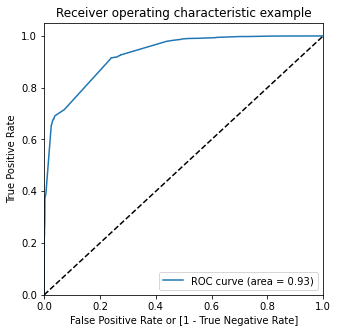

In [186]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
    

# STEP 10: Finding optimal threshold
...Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [187]:
# Let's create columns with different probability cutoffs numbers = [float(x)/10 for x in range (10)]
numbers = [float(x)/10 for x in range (10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.455187,618332,0,1,1,1,1,1,0,0,0,0,0
1,1,0.999470,605316,1,1,1,1,1,1,1,1,1,1,1
2,0,0.002925,655685,0,1,0,0,0,0,0,0,0,0,0
3,0,0.009037,581653,0,1,0,0,0,0,0,0,0,0,0
4,1,0.830928,619035,1,1,1,1,1,1,1,1,1,1,0


In [188]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375653  1.000000  0.000000
0.1   0.1  0.718766  0.978905  0.562247
0.2   0.2  0.810824  0.917864  0.746422
0.3   0.3  0.818749  0.915619  0.760464
0.4   0.4  0.818918  0.915619  0.760735
0.5   0.5  0.860395  0.691203  0.962193
0.6   0.6  0.857865  0.671005  0.970294
0.7   0.7  0.857697  0.669659  0.970834
0.8   0.8  0.854662  0.656643  0.973805
0.9   0.9  0.763278  0.374327  0.997299


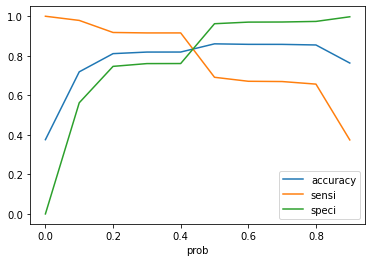

In [189]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


###### 
The line of Accuracy, sesntivity and specificity intersect at 0.42 probablity and 0.42 is optimum point as a cutoff probablity.

In [190]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x:1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.455187,618332,0,1,1,1,1,1,0,0,0,0,0,1
1,1,0.999470,605316,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.002925,655685,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.009037,581653,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.830928,619035,1,1,1,1,1,1,1,1,1,1,0,1


In [191]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8189175518462317

In [192]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2817,  886],
       [ 188, 2040]], dtype=int64)

In [193]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [194]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9156193895870736

In [195]:
# Let us calculate specificity
TN / float(TN+FP)

0.7607345395625169

In [196]:
# calculate the false positive  rate  = predicting churn when customer does not churned.
print(FP/float(TN+FP))

0.23926546043748312


In [197]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6971975393028025


In [198]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9374376039933444


## Precision and Recall

In [199]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[2817,  886],
       [ 188, 2040]], dtype=int64)

In [200]:
#precision TP/TP+FP
confusion[1,1] / (confusion [1,1] + confusion [0,1])

0.6971975393028025

In [201]:
###### Recall TP/TP+FN
confusion[1,1] / (confusion [1,1] + confusion [1,0])

0.9156193895870736

In [202]:
from sklearn.metrics import precision_score, recall_score

In [203]:
?precision_score

In [204]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6971975393028025

In [205]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9156193895870736

In [206]:
from sklearn.metrics import precision_recall_curve

In [207]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       0
 4       1
        ..
 5926    0
 5927    0
 5928    0
 5929    0
 5930    0
 Name: Converted, Length: 5931, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 5926    0
 5927    0
 5928    0
 5929    0
 5930    0
 Name: predicted, Length: 5931, dtype: int64)

In [208]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

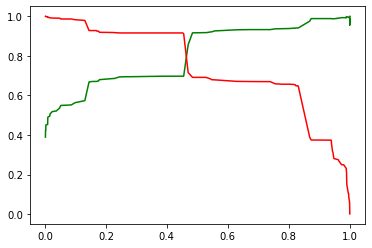

In [209]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# STEP 11: Making predictions on the test set

In [210]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scalar.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [211]:
X_test = X_test[col8]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Last Activity_SMS Sent,What is your current occupation_Working Professional,Lead Quality_Not Sure,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
Lead Number,,,,,,,,,,,,
590700,0,0,0,0,1,0,0,0,0,0,1,0
594833,0,0,1,0,0,0,0,0,0,1,0,0
600817,0,0,0,0,0,0,0,0,0,1,0,0
656621,0,0,0,0,0,0,0,0,1,0,0,0
580732,1,0,0,0,0,0,0,0,0,0,1,0


In [212]:
X_test_sm = sm.add_constant(X_test)

###### 
Making predictions on the test set

In [213]:
y_test_pred = res.predict(X_test_sm )

In [214]:
y_test_pred[:10]

Lead Number
590700    0.008932
594833    0.830928
600817    0.455187
656621    0.002925
580732    0.000421
645114    0.009037
622288    0.001642
642070    0.001642
584463    0.455187
654491    0.130942
dtype: float64

In [215]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
Lead Number,
590700,0.008932
594833,0.830928
600817,0.455187
656621,0.002925
580732,0.000421


In [216]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [217]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [218]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [219]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [220]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,590700,0.008932
1,1,594833,0.830928
2,0,600817,0.455187
3,0,656621,0.002925
4,0,580732,0.000421


In [221]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final

,Converted,Lead Number,Converted_prob
0,0,590700,0.008932
1,1,594833,0.830928
2,0,600817,0.455187
3,0,656621,0.002925
4,0,580732,0.000421
...,...,...,...
2538,0,652345,0.015823
2539,1,632940,0.830928
2540,0,644450,0.002925
2541,0,586109,0.455187


In [222]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)


In [223]:
y_pred_final.head()

,Converted,Lead Number,Converted_prob,final_predicted
0,0,590700,0.008932,0
1,1,594833,0.830928,1
2,0,600817,0.455187,1
3,0,656621,0.002925,0
4,0,580732,0.000421,0


In [224]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)


0.8198977585528903

In [225]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1208,  372],
       [  86,  877]], dtype=int64)

In [226]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [227]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9106957424714434

In [228]:
# Let us calculate specificity
TN / float(TN+FP)

0.7645569620253164

###### 
Precision and Recall metrics for the test set

In [229]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7021617293835068
recall  0.9106957424714434


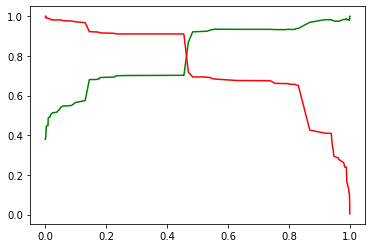

In [230]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###### Calculating the lead score

In [231]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
lead_train_pred = y_train_pred_final.copy()
lead_train_pred.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.455187,618332,0,1,1,1,1,1,0,0,0,0,0,1
1,1,0.999470,605316,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.002925,655685,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.009037,581653,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.830928,619035,1,1,1,1,1,1,1,1,1,1,0,1


In [232]:
# Dropping unnecessary columns from train dataset
lead_train_pred = lead_train_pred[['Lead Number','Converted','Converted_prob','final_predicted']]
lead_train_pred.head()

,Lead Number,Converted,Converted_prob,final_predicted
0,618332,1,0.455187,1
1,605316,1,0.999470,1
2,655685,0,0.002925,0
3,581653,0,0.009037,0
4,619035,1,0.830928,1


In [233]:
y_pred_final['lead_score'] = y_pred_final.Converted_prob.map(lambda X:round(X*100))

In [234]:
y_pred_final.head(25)

,Converted,Lead Number,Converted_prob,final_predicted,lead_score
0,0,590700,0.008932,0,1
1,1,594833,0.830928,1,83
2,0,600817,0.455187,1,46
3,0,656621,0.002925,0,0
4,0,580732,0.000421,0,0
5,0,645114,0.009037,0,1
6,0,622288,0.001642,0,0
7,0,642070,0.001642,0,0
8,1,584463,0.455187,1,46
9,0,654491,0.130942,0,13


In [235]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.36
Lead Origin_Lead Add Form                               3.02
Last Activity_SMS Sent                                  1.77
What is your current occupation_Working Professional    2.93
Lead Quality_Not Sure                                   1.70
Tags_Busy                                               3.11
Tags_Closed by Horizzon                                10.31
Tags_Lost to EINS                                       9.15
Tags_Ringing                                           -1.13
Tags_Will revert after reading the email                4.52
Last Notable Activity_Modified                         -1.71
Last Notable Activity_Olark Chat Conversation          -2.03
dtype: float64

In [236]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -13.22
Lead Origin_Lead Add Form                               29.27
Last Activity_SMS Sent                                  17.19
What is your current occupation_Working Professional    28.44
Lead Quality_Not Sure                                   16.50
Tags_Busy                                               30.19
Tags_Closed by Horizzon                                100.00
Tags_Lost to EINS                                       88.75
Tags_Ringing                                           -11.00
Tags_Will revert after reading the email                43.82
Last Notable Activity_Modified                         -16.61
Last Notable Activity_Olark Chat Conversation          -19.66
dtype: float64

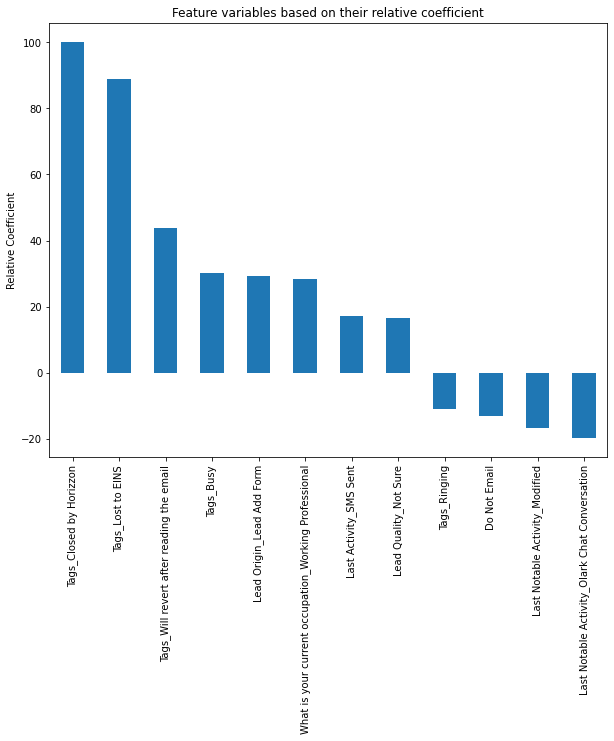

In [237]:
# Plot showing the feature variables based on their relative coefficient values
plt.figure(figsize = (10,8))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [238]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
6,Tags_Closed by Horizzon,100.00
7,Tags_Lost to EINS,88.75
9,Tags_Will revert after reading the email,43.82


###### 
Conclusion :-

  .we have checked sensitivity, specificity as well as precision and Recall and optimal point also considered.
  .cut off based on sensitivity , specificity for calculating final prediction .
  
Top 3 variables are converted as a lead:

  . Tags_Closed by Horizzon
  
  . Tags_Lost to EINS
  
  . Tags_Will revert after reading the email
  
Top 3 variables have need impovement these are

  . Do not Email
  
  . Last Notable Activity_modified
  
  . Last Notable Activity_Olark_chat_conversation